In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
"""
DATA

playlist used: https://open.spotify.com/playlist/54nv8jbrm4JoHEZ49Qvjgl?si=e62b561e3b084058
songs: 9964 songs
total playtime: 622hrs 1min
"""

'\nDATA\n\nplaylist used: https://open.spotify.com/playlist/54nv8jbrm4JoHEZ49Qvjgl?si=e62b561e3b084058\nsongs: 9964 songs\ntotal playtime: 622hrs 1min\n'

## Import Super-Genre Data

In [29]:
g_df = pd.read_csv('super_genre_scaled.csv')

In [30]:
g_df.head(2)

,genre,name,album,artist,release_date,duration_ms,popularity,acousticness,danceability,energy,key,mode,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,super_genre
0,pop,"['Firework', 'All We Are', ""The Man Who Can't ...",['Katy Perry - Teenage Dream: The Complete Con...,"['Katy Perry', 'OneRepublic', 'The Script', 'A...","['2012-03-12', '2007-01-01', '2008-09-08', '20...",-0.115255,0.622408,-0.046669,0.221023,-0.028776,0.081218,-0.109565,-0.389960,-0.115209,0.379336,-0.057248,-0.202428,-0.131381,0.070971,6
1,dance pop,"['Firework', 'All We Are', ""The Man Who Can't ...",['Katy Perry - Teenage Dream: The Complete Con...,"['Katy Perry', 'OneRepublic', 'The Script', 'B...","['2012-03-12', '2007-01-01', '2008-09-08', '20...",-0.164343,0.581920,-0.335696,0.421467,0.257826,0.083864,-0.150184,-0.386008,-0.017096,0.524002,0.009541,0.054038,-0.088384,0.114436,6


In [118]:
g_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1019 entries, 0 to 1018
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genre             1019 non-null   object 
 1   name              1019 non-null   object 
 2   album             1019 non-null   object 
 3   artist            1019 non-null   object 
 4   release_date      1019 non-null   object 
 5   duration_ms       1019 non-null   float64
 6   popularity        1019 non-null   float64
 7   acousticness      1019 non-null   float64
 8   danceability      1019 non-null   float64
 9   energy            1019 non-null   float64
 10  key               1019 non-null   float64
 11  mode              1019 non-null   float64
 12  instrumentalness  1019 non-null   float64
 13  liveness          1019 non-null   float64
 14  loudness          1019 non-null   float64
 15  speechiness       1019 non-null   float64
 16  valence           1019 non-null   float64


In [125]:
import ast
for i in range(len(g_df)):
    g_df['name'][i] = ast.literal_eval(g_df['name'][i])
    g_df['album'][i] = ast.literal_eval(g_df['album'][i])
    g_df['artist'][i] = ast.literal_eval(g_df['artist'][i])
    g_df['release_date'][i] = ast.literal_eval(g_df['release_date'][i])

<ipython-input-125-9e0e048dc2cb>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-125-9e0e048dc2cb>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-125-9e0e048dc2cb>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-125-9e0e048dc2cb>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/

## Plot Super-Genres

In [76]:
super_genre = {}
for i in range(0,12):
    g_list = []
    for j in range(len(g_df)):
        if g_df['super_genre'][j] == i:
            g_list.append(g_df['genre'][j])
    super_genre[i] = g_list

In [78]:
#super_genre

In [33]:
polar=g_df.groupby("super_genre").mean().reset_index()
polar=pd.melt(polar,id_vars=["super_genre"])
fig1 = px.line_polar(polar, r="value", theta="variable", color="super_genre", line_close=True,height=700,width=900)
fig1.show()

<h3> Super-Genres in Details </h3>

In [70]:
polar0=g_df.groupby("super_genre").mean().reset_index().iloc[0][1:]
polar0.index

Index(['duration_ms', 'popularity', 'acousticness', 'danceability', 'energy',
       'key', 'mode', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

Super Genre Group: 0 &  Top Genre: canadian ccm


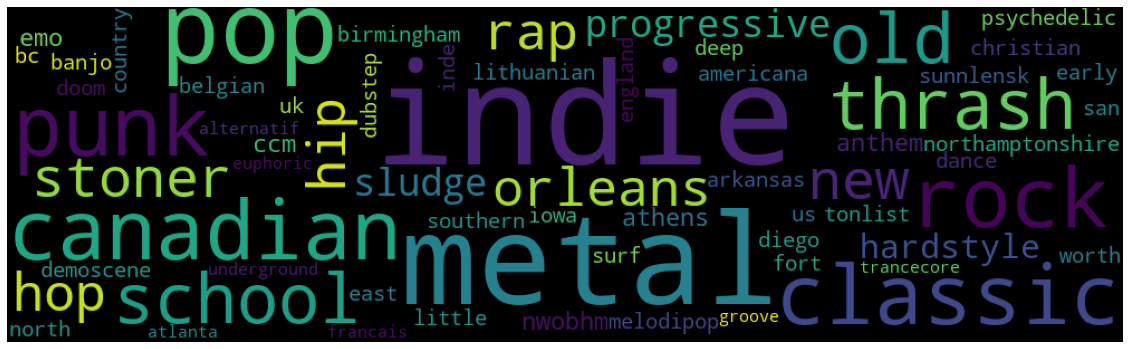

Super Genre Group: 1 &  Top Genre: house


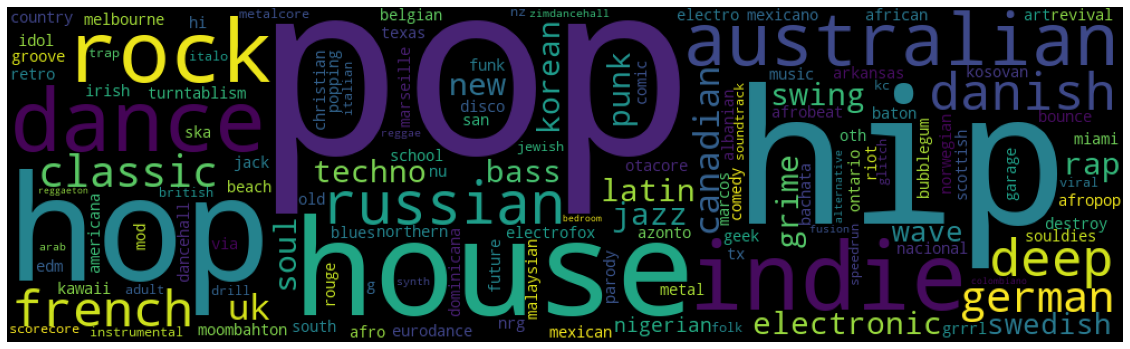

Super Genre Group: 2 &  Top Genre: stomp and holler


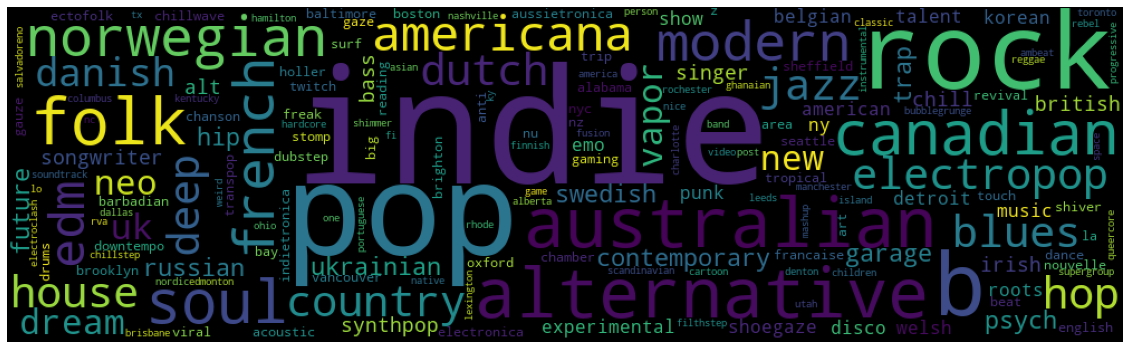

Super Genre Group: 3 &  Top Genre: compositional ambient


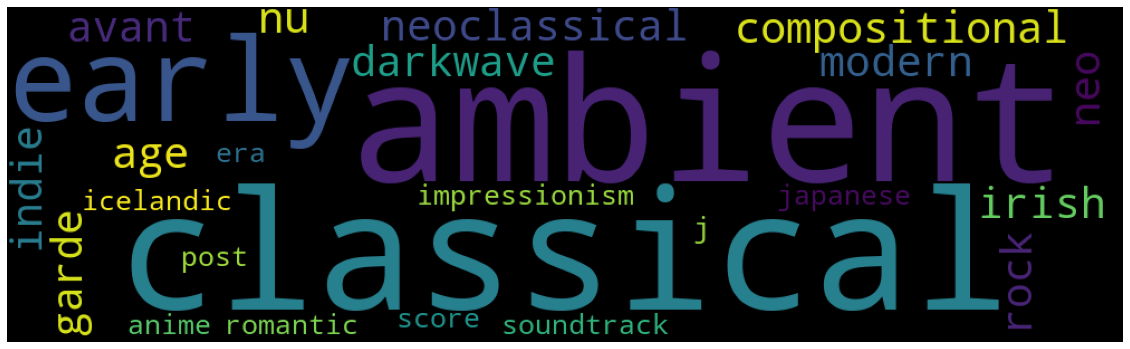

Super Genre Group: 4 &  Top Genre: hawaiian


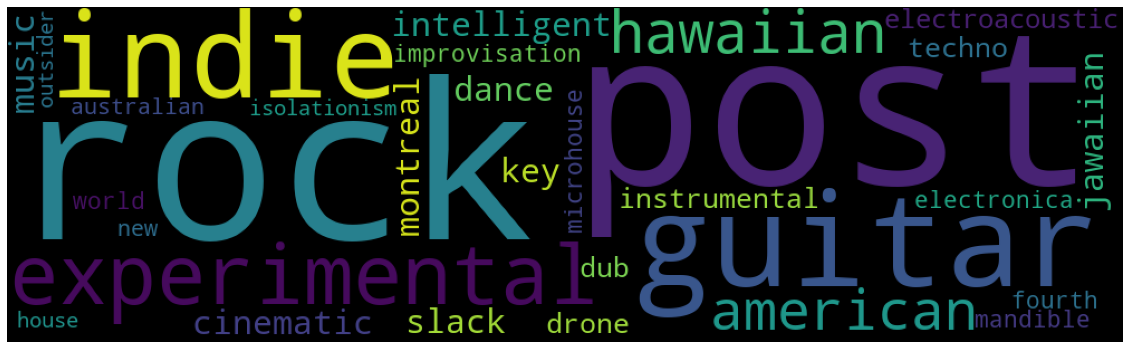

Super Genre Group: 5 &  Top Genre: canadian pop punk


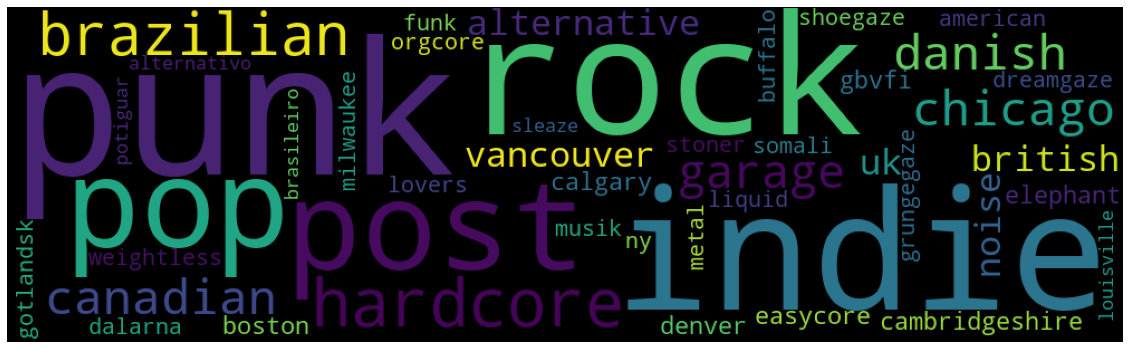

Super Genre Group: 6 &  Top Genre: pop


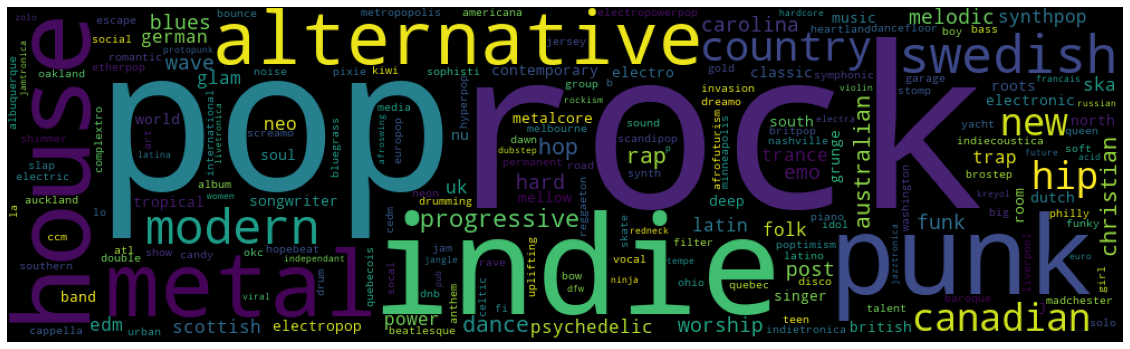

Super Genre Group: 7 &  Top Genre: minneapolis indie


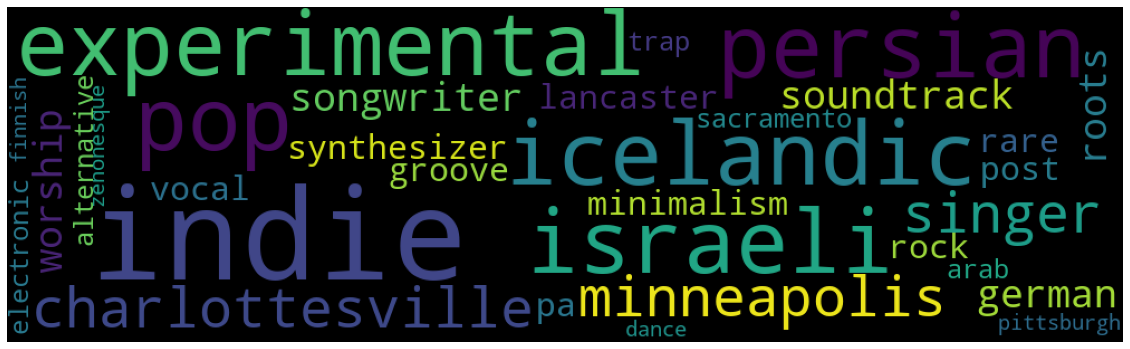

Super Genre Group: 8 &  Top Genre: singer-songwriter


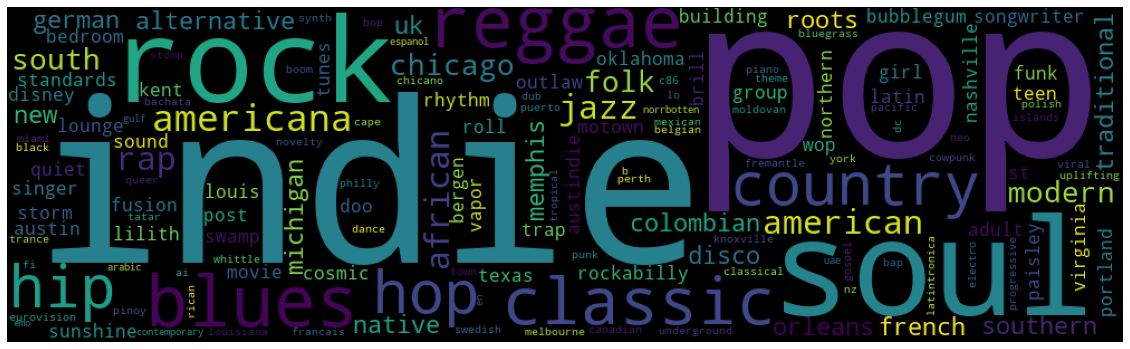

Super Genre Group: 9 &  Top Genre: pop rap


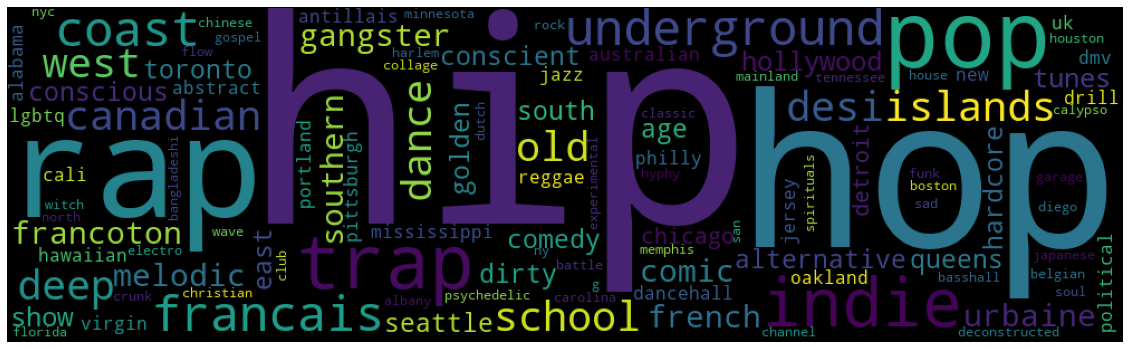

Super Genre Group: 10 &  Top Genre: melancholia


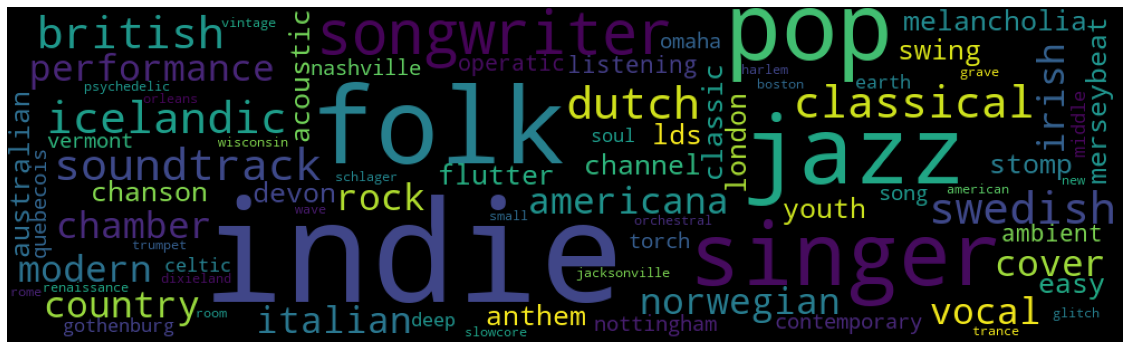

Super Genre Group: 11 &  Top Genre: lund indie


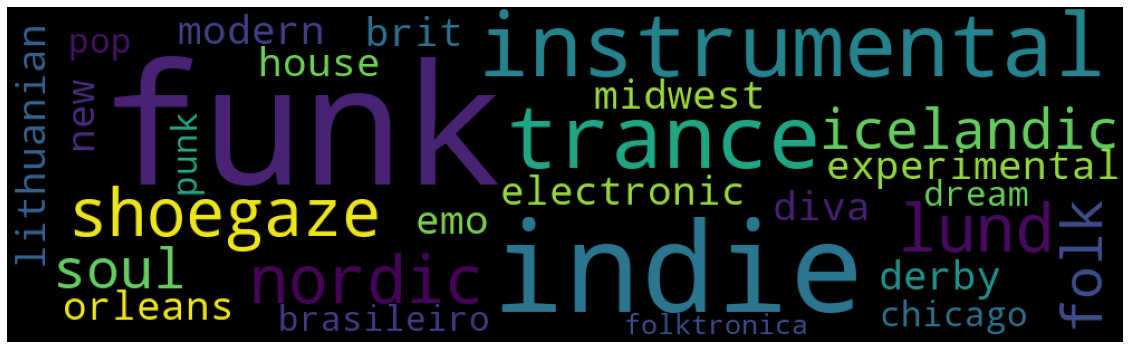

In [82]:
from wordcloud import WordCloud, STOPWORDS 

for i in range(12):
    #word cloud
    g_name = ''
    for j in super_genre[i]:
        g_name += j + ", "
    text = g_name
    wordcloud = WordCloud(width = 1000, height = 300, random_state=1, collocations=False, stopwords = STOPWORDS).generate(text)
    print("Super Genre Group: "+str(i) + " & "+" Top Genre: "+super_genre[i][0])
    plt.figure(figsize=(20, 10))
    plt.imshow(wordcloud) 
    plt.axis("off")
    plt.show()
    
    #polar chart
    values = g_df.groupby("super_genre").mean().reset_index().iloc[i][1:]
    variables = values.index
    fig = px.line_polar(r=values, theta=variables, line_close=True,height=600,width=500)
    fig.show()

In [128]:
for j in range(12):
    for i in range(len(g_df)):
        if g_df['super_genre'][i] == j:
            print("Super Genre: ", str(j), '\n')
            print("Song Names: ",g_df.iloc[i]['name'][:5],'\n',"Artist Names: ",g_df.iloc[i]['artist'][:5],'\n')

Super Genre:  0 

Song Names:  ['Look on Up', 'Courtesy Call', 'War of Change', 'Untraveled Road', 'Be Somebody'] 
 Artist Names:  ['Relient K', 'Thousand Foot Krutch', 'Thousand Foot Krutch', 'Thousand Foot Krutch', 'Thousand Foot Krutch'] 

Super Genre:  0 

Song Names:  ['Keeper', 'Honey', 'Mess', "We'll Be Okay", 'Submission'] 
 Artist Names:  ['With Confidence', 'Moose Blood', 'Real Friends', 'With Confidence', 'Basement'] 

Super Genre:  0 

Song Names:  ['Man On The Moon', 'Losing My Religion', 'Everybody Hurts', "It's The End Of The World As We Know It (And I Feel Fine)", 'Heart Attack Blues'] 
 Artist Names:  ['R.E.M.', 'R.E.M.', 'R.E.M.', 'R.E.M.', 'Futurebirds'] 

Super Genre:  0 

Song Names:  ['Pour Some Sugar On Me (Re-Recorded Version)', 'Pour Some Sugar On Me (2012)', 'Hysteria 2013 (Re-Recorded Version) - Single', 'Rock Of Ages (2012)', 'When Love & Hate Collide'] 
 Artist Names:  ['Def Leppard', 'Def Leppard', 'Def Leppard', 'Def Leppard', 'Def Leppard'] 

Super Genre

Super Genre:  2 

Song Names:  ['In For The Kill', 'Somebody to Die For', 'Mercy', 'Wonderful Life', 'Recover'] 
 Artist Names:  ['La Roux', 'Hurts', 'Hurts', 'Hurts', 'CHVRCHES'] 

Super Genre:  2 

Song Names:  ["Friday I'm In Love", "I'm Writing a Novel", 'Never Had Nobody Like You', 'Black Water', 'To Be Alone With You'] 
 Artist Names:  ['Yo La Tengo', 'Father John Misty', 'M. Ward', 'Timber Timbre', 'Sufjan Stevens'] 

Super Genre:  2 

Song Names:  ['Geronimo', 'Let Me Down Easy', 'Find Someone', 'Monday', 'Southern Sun'] 
 Artist Names:  ['Sheppard', 'Sheppard', 'Sheppard', 'Matt Corby', 'Boy & Bear'] 

Super Genre:  2 

Song Names:  ["Friday I'm In Love", 'The Open Road', 'Laura', 'Sea Of Teeth', "I'm on Fire"] 
 Artist Names:  ['Yo La Tengo', 'Postiljonen', 'Bat For Lashes', 'Sparklehorse', 'Bat For Lashes'] 

Super Genre:  2 

Song Names:  ['The Little Things (feat. Angela McCluskey)', 'Wasted On You', 'Smoke Signals', 'Open Arms', 'Aftergold (feat. Tove Styrke)'] 
 Artist N

 Artist Names:  ['HYUKOH'] 

Super Genre:  2 

Song Names:  ['Citizen Kane'] 
 Artist Names:  ['HYUKOH'] 

Super Genre:  2 

Song Names:  ['Citizen Kane'] 
 Artist Names:  ['HYUKOH'] 

Super Genre:  2 

Song Names:  ['Midsummer Madness'] 
 Artist Names:  ['88rising'] 

Super Genre:  3 

Song Names:  ['Circling', 'Image-Autumn-Womb', 'Them (Solo Piano Edit)', 'Melancholie', 'As Old Roads'] 
 Artist Names:  ['Nils Frahm', 'Goldmund', 'Nils Frahm', 'Illuminine', 'Goldmund'] 

Super Genre:  3 

Song Names:  ['Circling', 'Image-Autumn-Womb', 'Saving Us a Riot (Live)', 'Them (Solo Piano Edit)', 'Melancholie'] 
 Artist Names:  ['Nils Frahm', 'Goldmund', 'Phoria', 'Nils Frahm', 'Illuminine'] 

Super Genre:  3 

Song Names:  ['Image-Autumn-Womb', 'As Old Roads', 'Haru'] 
 Artist Names:  ['Goldmund', 'Goldmund', 'Fennesz'] 

Super Genre:  3 

Song Names:  ['Image-Autumn-Womb', 'As Old Roads', 'Water from the Same Source'] 
 Artist Names:  ['Goldmund', 'Goldmund', "Rachel's"] 

Super Genre:  3 



Song Names:  ['The Impression That I Get', 'Nevermind Me', 'Ruby Soho', '21st Century (Digital Boy)', 'Miss Murder'] 
 Artist Names:  ['The Mighty Mighty Bosstones', 'The Mighty Mighty Bosstones', 'Rancid', 'Bad Religion', 'AFI'] 

Super Genre:  6 

Song Names:  ['Castle', 'Hold Me Down', 'New Americana', 'Drive', 'Hurricane'] 
 Artist Names:  ['Halsey', 'Halsey', 'Halsey', 'Halsey', 'Halsey'] 

Super Genre:  6 

Song Names:  ["God's Not Dead (Like A Lion)", 'Something Beautiful', 'How He Loves - Radio Edit', 'If It Ends Today', 'Never Alone - Best Of'] 
 Artist Names:  ['Newsboys', 'Steven Curtis Chapman', 'David Crowder Band', 'Kutless', 'BarlowGirl'] 

Super Genre:  6 

Song Names:  ["God's Not Dead (Like A Lion)", 'Something Beautiful', 'How He Loves - Radio Edit', 'If It Ends Today', 'Never Alone - Best Of'] 
 Artist Names:  ['Newsboys', 'Steven Curtis Chapman', 'David Crowder Band', 'Kutless', 'BarlowGirl'] 

Super Genre:  6 

Song Names:  ['American Honey', 'Something in the Wat


Super Genre:  6 

Song Names:  ['Icebreaker'] 
 Artist Names:  ['Buxton'] 

Super Genre:  6 

Song Names:  ['Outlaw Heart'] 
 Artist Names:  ['Tiger Army'] 

Super Genre:  6 

Song Names:  ['Outlaw Heart'] 
 Artist Names:  ['Tiger Army'] 

Super Genre:  6 

Song Names:  ['1985'] 
 Artist Names:  ['Bowling For Soup'] 

Super Genre:  6 

Song Names:  ["Don't You Need Somebody (feat. Enrique Iglesias, R. City, Serayah & Shaggy)"] 
 Artist Names:  ['RedOne'] 

Super Genre:  6 

Song Names:  ['Lost In You'] 
 Artist Names:  ['Erick Morillo'] 

Super Genre:  6 

Song Names:  ['Lost In You'] 
 Artist Names:  ['Erick Morillo'] 

Super Genre:  6 

Song Names:  ["I Don't Want to Know"] 
 Artist Names:  ['The Last Bandoleros'] 

Super Genre:  6 

Song Names:  ['I Need My Girl'] 
 Artist Names:  ['Gnarly Gibbs'] 

Super Genre:  6 

Song Names:  ['7 Seconds (feat. Neneh Cherry)'] 
 Artist Names:  ["Youssou N'Dour"] 

Super Genre:  6 

Song Names:  ['7 Seconds (feat. Neneh Cherry)'] 
 Artist Names:

Song Names:  ['Avenir - Radio Edit', 'Smile', '92i veyron', 'Validée', 'Pinocchio'] 
 Artist Names:  ['Louane', 'Youssoupha', 'Booba', 'Booba', 'Booba'] 

Super Genre:  9 

Song Names:  ['Dinosaur Laser Fight', 'Fire Water Burn', 'Istanbul (Not Constantinople)', 'Birdhouse in Your Soul', 'Foxtrot Uniform Charlie Kilo'] 
 Artist Names:  ['Ninja Sex Party', 'Bloodhound Gang', 'They Might Be Giants', 'They Might Be Giants', 'Bloodhound Gang'] 

Super Genre:  9 

Song Names:  ['Glory (From the Motion Picture Selma)', 'Killing Me Softly With His Song', 'Jump Around', "Gangsta's Paradise (feat. L.V.)", 'Mo Money Mo Problems (feat. Mase & Puff Daddy)'] 
 Artist Names:  ['Common', 'Fugees', 'House Of Pain', 'Coolio', 'The Notorious B.I.G.'] 

Super Genre:  9 

Song Names:  ['Titanium Acoustic Cover', 'All The Way', 'Are U Having Any Fun? (feat. Meghan Tonjes)', 'Once in a While', 'Me, Myself & I'] 
 Artist Names:  ['Collin McLoughlin', 'Timeflies', 'Hoodie Allen', 'Timeflies', 'G-Eazy'] 

Supe

Super Genre:  11 

Song Names:  ['Haru', 'I Heard It Through The Grapevine'] 
 Artist Names:  ['Fennesz', 'The Slits'] 

Super Genre:  11 

Song Names:  ['Cissy Strut'] 
 Artist Names:  ['The Meters'] 

Super Genre:  11 

Song Names:  ['Cissy Strut'] 
 Artist Names:  ['The Meters'] 

Super Genre:  11 

Song Names:  ['Green Onions - 45 Version'] 
 Artist Names:  ["Booker T. & the M.G.'s"] 

Super Genre:  11 

Song Names:  ['Your Woman'] 
 Artist Names:  ['White Town'] 

Super Genre:  11 

Song Names:  ['Walking with Elephants'] 
 Artist Names:  ['Ten Walls'] 

Super Genre:  11 

Song Names:  ['Five Silent Miles'] 
 Artist Names:  ['American Football'] 

Super Genre:  11 

Song Names:  ['Love Plus One'] 
 Artist Names:  ['Haircut 100'] 

Super Genre:  11 

Song Names:  ['Gonna Make You Sweat (Everybody Dance Now)'] 
 Artist Names:  ['C & C Music Factory'] 

Super Genre:  11 

Song Names:  ['Mess'] 
 Artist Names:  ['Real Friends'] 

Super Genre:  11 

Song Names:  ['Potter'] 
 Artist Nam